#Importing necessary modules

In [80]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

#Taking user input of number of records and creating **empty array** for storing **x** values and their **functional values**

In [81]:
n = int(input('How many records do you want to enter : '))

x = np.empty([n])
y = np.empty([n, n])

x_axis = np.array([])
y_axis = np.array([])

expr = input('Enter the f(x) where f(x) = 0 in numpy notation : ')

How many records do you want to enter : 5
Enter the f(x) where f(x) = 0 in numpy notation : np.exp(2*x)


# function to evaluate interpolating polynomial

In [82]:
def f(x0, expr):
    x = sym.symbols('x')
    val = eval(expr, {"x": x0, "np": np})
    return val

# Taking user input of **x** values and their **functional values**

In [83]:
for i in range(n):
    x[i] = float(input(f'Enter the value of x{i} : '))
    y[i][0] = f(x[i], expr)

    x_axis = np.append(x_axis, x[i])
    y_axis = np.append(y_axis, y[i][0])

    print(f'The value of f({i}) : {y[i][0]}')

Enter the value of x0 : 0.1
The value of f(0) : 1.2214027581601699
Enter the value of x1 : .2
The value of f(1) : 1.4918246976412703
Enter the value of x2 : .3
The value of f(2) : 1.8221188003905089
Enter the value of x3 : .4
The value of f(3) : 2.225540928492468
Enter the value of x4 : .5
The value of f(4) : 2.718281828459045


# plotting the graph for values of **x** and **f(x)**

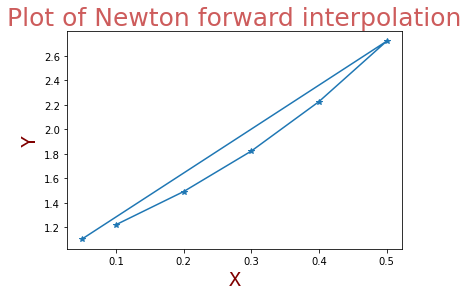

In [91]:
font1 = {'family':'monospace','color':'maroon','size':20}
font2 = {'family':'monospace','color':'maroon','size':20}
font3 = {'family':'sans-serif','color':'indianred','size':25}

plt.plot(x_axis, y_axis, marker = '*')
plt.title('Plot of Newton forward interpolation', fontdict = font3)
plt.xlabel("X", fontdict = font1)
plt.ylabel("Y", fontdict = font2)
plt.show()

# Calculating and printing the **forward differnce table**

In [85]:
for i in range(1,n):
    for j in range(n-i):
        y[j][i] = y[j+1][i-1] - y[j][i-1]

print('----------------------------------------------------------------------')
print(f'x(i)\t\t y(i)\t\t y1(i)\t\t y2(i)\t\t y3(i)')
print('----------------------------------------------------------------------')
for i in range(n):
    print('%0.2f' %(x[i]), end='')
    for j in range(n-i):
        print('\t\t%0.2f' %(y[i][j]), end='')
    print()

----------------------------------------------------------------------
x(i)		 y(i)		 y1(i)		 y2(i)		 y3(i)
----------------------------------------------------------------------
0.10		1.22		0.27		0.06		0.01		0.00
0.20		1.49		0.33		0.07		0.02
0.30		1.82		0.40		0.09
0.40		2.23		0.49
0.50		2.72


# calculating and printing the value of **h** and **u**

In [86]:
val = float(input(f"Enter value of x for finding f(x) : "))
h = x[1] - x[0]
u = (val - x[0])/h
print(f'The Value of h is {h} and the value of u is {u}')

Enter value of x for finding f(x) : .05
The Value of h is 0.1 and the value of u is -0.5


# printing the values of **coefficient** and **multiplier**

In [88]:
print('----------------------------------------------------------------------')
print(f'coefficient\t\t\t Multiplier')
print('----------------------------------------------------------------------')

for i in range(-1, n - 1):
    if i == -1:
        coef = 1
    else:
        coef = coef_cal(i, u)
    mul = y[0][i + 1]
    print("%0.3f\t\t\t\t%f" %(coef, mul))

----------------------------------------------------------------------
coefficient			 Multiplier
----------------------------------------------------------------------
1.000				1.221403
-0.500				0.270422
0.750				0.059872
-1.875				0.013256
6.562				0.002935


# Function to calculate **coefficient**

In [87]:
def coef_cal(n, u):
    temp = u
    if n == 0:
        return temp
    for i in range(1, n + 1):
        temp *= (u - i)
    return temp

# Function to calculate the value of **polynomial** for enterted **interpolating point**

In [89]:
def final_cal():
    sum = y[0][0]
    for i in range(n - 1):
        sum = sum + coef_cal(i, u)/np.math.factorial(i + 1)*y[0][i + 1]

    return sum

# Finally appending the values of **interpolating point** and value of **ploynomial** for plotting

In [90]:
sum = final_cal()

x_axis = np.append(x_axis, val)
y_axis = np.append(y_axis, sum)

1.1053039002043332


# Using special variable and creating main function

In [92]:
def main():
    final_val = final_cal()
    print(final_val)

if __name__ == '__main__':
    main()

1.1053039002043332
